In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
df=pd.read_csv("AdmissionData.csv")
col_names=df.columns.tolist()
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [30]:
df.drop(['Serial No.'],axis=1,inplace=True)
var=df.columns.values.tolist()
y=df['Chance of Admit']
x=[i for i in var if i not in ['Chance of Admit']]
x=df[x]

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)
xs = MinMaxScaler()
x_train[x_train.columns] = xs.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = xs.transform(x_test[x_test.columns])

/Users/amoghr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/amoghr/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/amoghr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [32]:
cy_train=[1 if chance > 0.75 else 0 for chance in y_train]
cy_train=np.array(cy_train)

cy_test=[1 if chance > 0.75 else 0 for chance in y_test]
cy_test=np.array(cy_test)

In [33]:
rf = RandomForestClassifier()
rf.fit(x_train, cy_train)
pred = rf.predict(x_test)

In [34]:
f_imp=pd.Series(rf.feature_importances_,index=x_train.columns).sort_values(ascending=False)
print(f_imp)

CGPA                 0.348095
GRE Score            0.216855
TOEFL Score          0.204724
University Rating    0.075802
SOP                  0.073420
LOR                  0.060823
Research             0.020282
dtype: float64


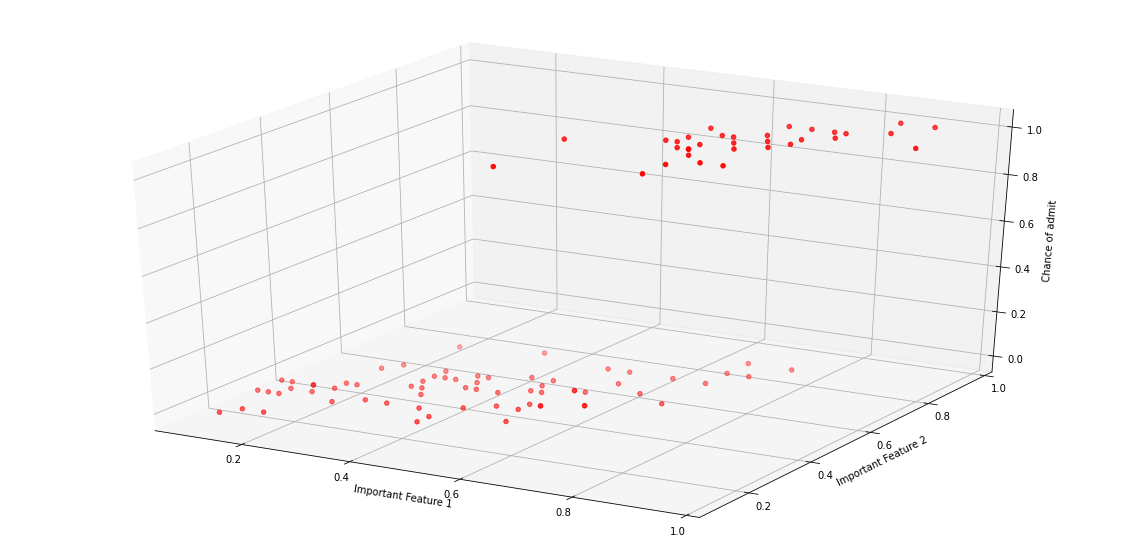

In [35]:
ax = plt.figure(figsize=(20,10)).add_subplot(projection = '3d')
ax.set_xlabel('Important Feature 1')
ax.set_ylabel('Important Feature 2')
ax.set_zlabel('Chance of admit')
#ax.plot3D(x_test[:,0],x_test[:,1],pred,c = 'blue');
ax.scatter3D(x_test.iloc[:,0],x_test.iloc[:,1],cy_test,c = 'red');

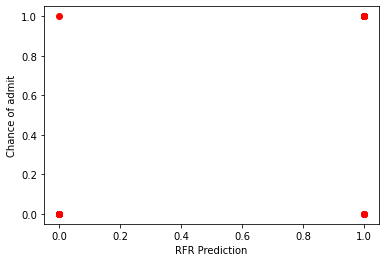

In [36]:
plt.xlabel('RFR Prediction')
plt.ylabel('Chance of admit')
plt.scatter(rf.predict(x_test), cy_test,color='red');

In [37]:
test_set_sme = mean_squared_error(cy_test, rf.predict(x_test))
test_set_rmse = np.sqrt(test_set_sme)
test_set_r2 = r2_score(cy_test, rf.predict(x_test))
print("Squared Mean Error= ", test_set_sme)
print("Root Squared Mean Error= ", test_set_rmse)
print("Coefficient of Determination= ", test_set_r2)

Squared Mean Error=  0.05
Root Squared Mean Error=  0.22360679774997896
Coefficient of Determination=  0.7738579828132066


In [38]:
score = accuracy_score(cy_test, rf.predict(x_test))
print("Accuracy Acheived= ", score*100,"%!")
print(classification_report(rf.predict(x_test), cy_test))

Accuracy Acheived=  95.0 %!
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        64
           1       0.97      0.89      0.93        36

    accuracy                           0.95       100
   macro avg       0.95      0.94      0.94       100
weighted avg       0.95      0.95      0.95       100

